In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Load the dataset
data_url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv'
data = pd.read_csv(data_url)
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

The data has 8425 rows × 23 columns

In [2]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [4]:
data.shape

(8425, 23)

data has 8425 rows × 23 columns out of which 1 is target and remaining are independent variable

In [6]:
data.columns
data.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
#checking the null values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are null values in the data frame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

<AxesSubplot:>

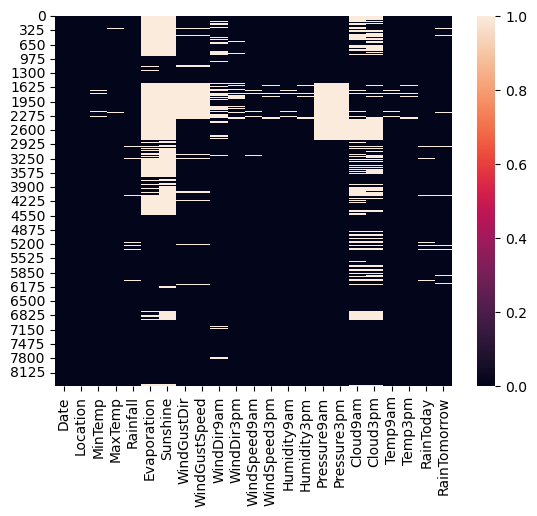

In [9]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is no single colour so there are null values as seen above also

In [11]:
# to check unique vqlues
data['RainTomorrow'].unique()


array(['No', 'Yes', nan], dtype=object)

.The out put has binary classification problem. as the nuber of unique outcome is 2 
the ration of unique values to total number of 32560 rows is 2/8425=.00023739.

In [12]:
data['RainToday'].nunique()# number of unique values


2

In [14]:
data['Rainfall'].nunique()# number of unique values


250

In [15]:
data['Evaporation'].nunique()# number of unique values

116

In [16]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [17]:
data["RainTomorrow"].unique()
data.shape[0]


8425

In [18]:
data.loc[data["RainTomorrow"]==" "]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]

In [53]:
# Replace null values with mean
data1 = data.fillna(data.mean())

# Display the DataFrame with filled values
print(data1)

        Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0.0       1.0     13.4  22.900000       0.6     5.389395  7.632205   
1        1.0       1.0      7.4  25.100000       0.0     5.389395  7.632205   
2        2.0       1.0     12.9  25.700000       0.0     5.389395  7.632205   
3        3.0       1.0      9.2  28.000000       0.0     5.389395  7.632205   
4        4.0       1.0     17.5  32.300000       1.0     5.389395  7.632205   
...      ...       ...      ...        ...       ...          ...       ...   
8420  2999.0       9.0      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000.0       9.0      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001.0       9.0      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002.0       9.0      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003.0       9.0     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  

<AxesSubplot:>

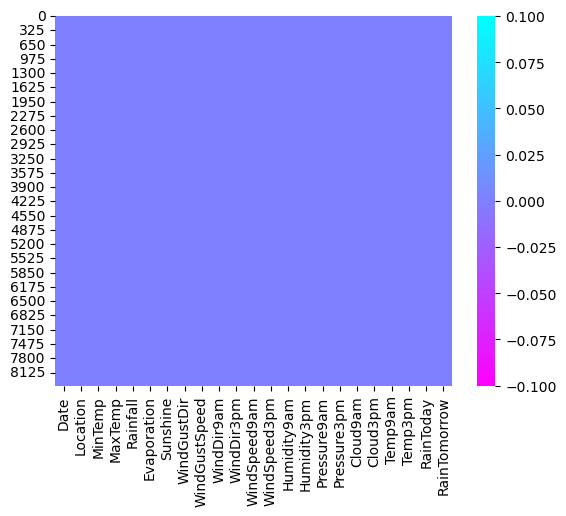

In [56]:
sns.heatmap(data1.isnull(),cmap="cool_r")

no null values

In [54]:
data1.describe()

Date     Location      MinTemp      MaxTemp     Rainfall  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1296.570564     5.793591    13.193305    23.859976     2.805913   
std     854.249434     3.162654     5.379488     6.114516    10.309308   
min       0.000000     0.000000    -2.000000     8.200000     0.000000   
25%     589.000000     3.000000     9.300000    19.300000     0.000000   
50%    1088.000000     6.000000    13.200000    23.300000     0.000000   
75%    2021.000000     8.000000    17.300000    28.000000     1.400000   
max    3003.000000    11.000000    28.500000    45.500000   371.000000   

       Evaporation     Sunshine  WindGustDir  WindGustSpeed   WindDir9am  ...  \
count  8425.000000  8425.000000  8425.000000    8425.000000  8425.000000  ...   
mean      5.389395     7.632205     7.780065      40.174469     7.733149  ...   
std       3.852004     2.825451     4.443288      13.776101     4.366057  ...   
min       0.000000     0.000000     0.000000       7.000000     0.000000  ...   
25%       4.000000     7.632205     4.000000      31.000000     4.000000  ...   
50%       5.389395     7.632205     7.780065      40.174469     7.733149  ...   
75%       5.389395     8.900000    12.000000      48.000000    12.000000  ...   
max     145.000000    13.900000    15.000000     107.000000    15.000000  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     67.822496    51.249790  1017.640233  1015.236075     4.566622   
std      16.774231    18.311894     6.275759     6.217451     2.429205   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1014.000000  1011.400000     3.000000   
50%      68.000000    51.000000  1017.640233  1015.236075     4.566622   
75%      80.000000    63.000000  1021.300000  1018.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  8425.000000  8425.000000  8425.000000  8425.000000   8425.000000  
mean      4.503183    17.762015    22.442934     0.243128      0.243220  
std       2.299419     5.608301     5.945849     0.422843      0.422923  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       3.000000    13.800000    18.100000     0.000000      0.000000  
50%       4.503183    17.762015    22.000000     0.000000      0.000000  
75%       7.000000    21.900000    26.300000     0.243128      0.243220  
max       8.000000    39.400000    44.100000     1.000000      1.000000  

[8 rows x 23 columns]

In [55]:
#checking the unique values in each column
data1.nunique().to_frame("No.of unique value")

No.of unique value
Date                         3004
Location                       12
MinTemp                       286
MaxTemp                       332
Rainfall                      251
Evaporation                   117
Sunshine                      141
WindGustDir                    17
WindGustSpeed                  53
WindDir9am                     17
WindDir3pm                     17
WindSpeed9am                   35
WindSpeed3pm                   36
Humidity9am                    91
Humidity3pm                    95
Pressure9am                   385
Pressure3pm                   375
Cloud9am                       10
Cloud3pm                       10
Temp9am                       305
Temp3pm                       329
RainToday                       3
RainTomorrow                    3

In [21]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [22]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


 data visualization

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64


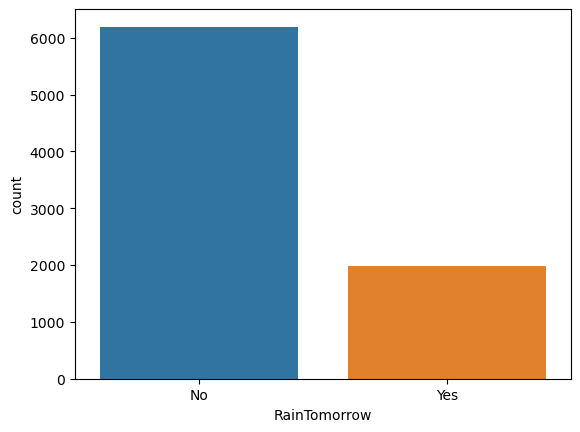

In [23]:

import seaborn as sns

if data["RainTomorrow"].notnull().any():
    sns.countplot(x='RainTomorrow', data=data)
    print(data["RainTomorrow"].value_counts())
else:
    print("The 'RainTomorrow' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

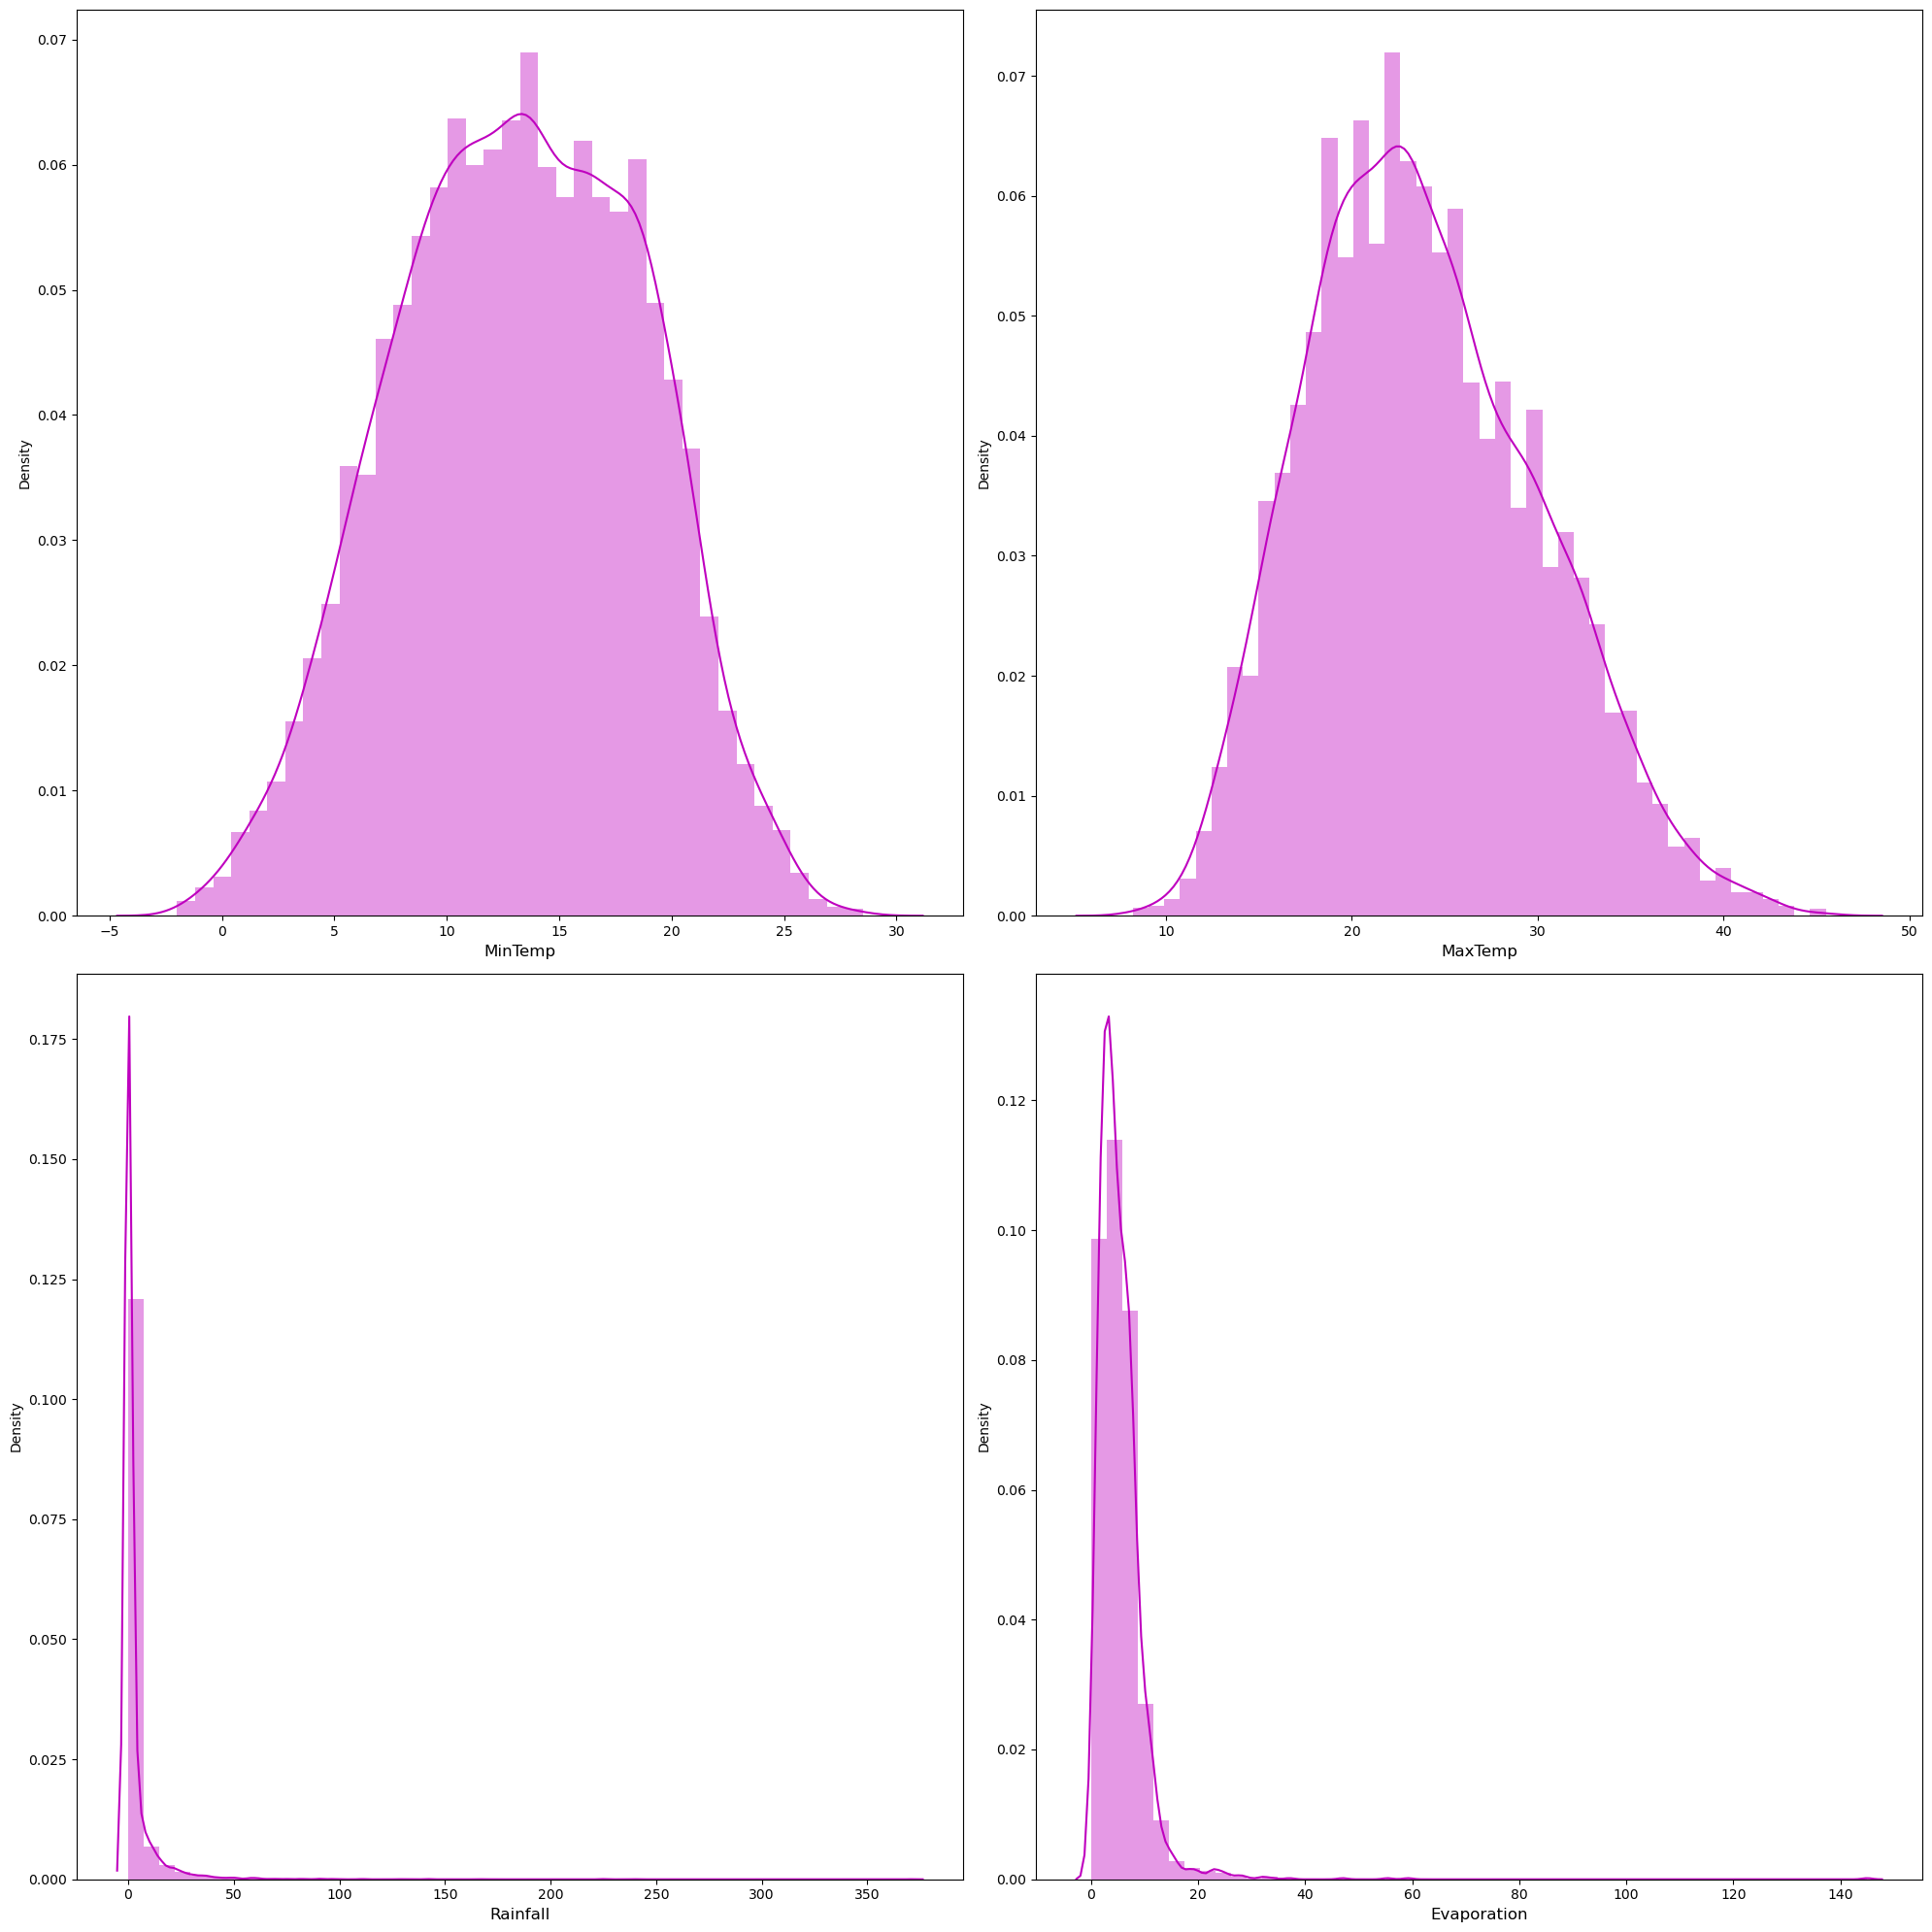

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


loam amount ,applicant income and coapplicant income is skewed  to right

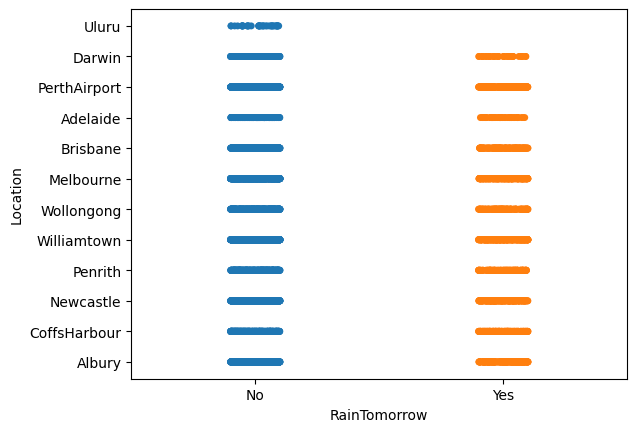

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='RainTomorrow', y='Location',data=data)
plt.show()

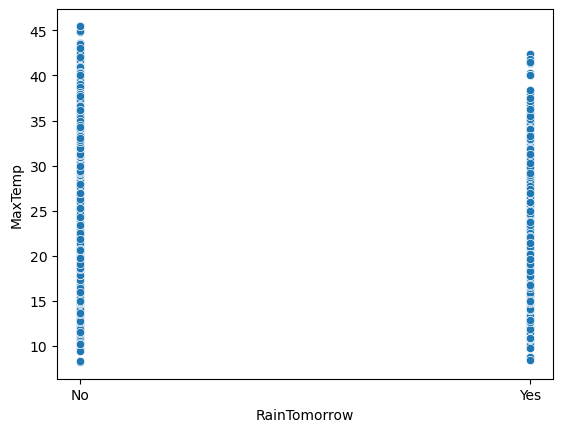

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(x='RainTomorrow', y="MaxTemp",data=data)
plt.show()


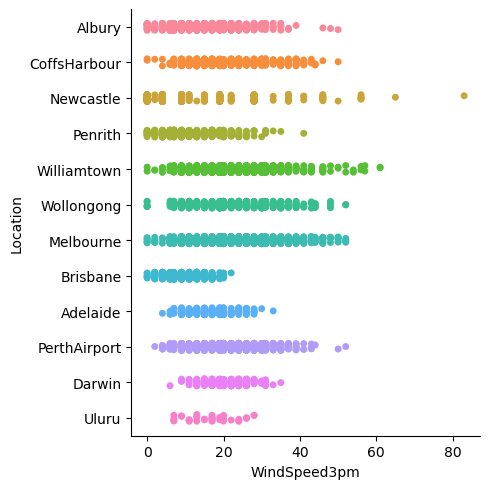

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='WindSpeed3pm', y='Location', data=data)
plt.show()


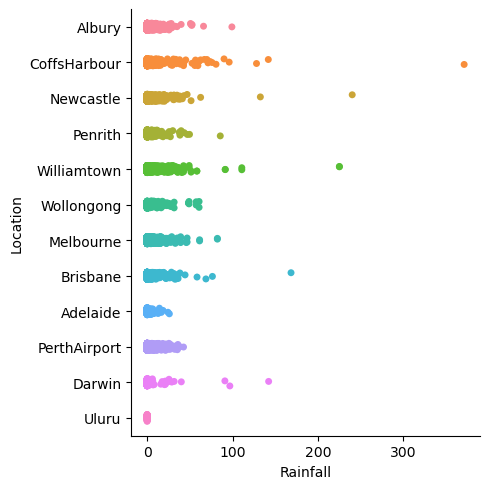

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Rainfall', y="Location",data=data)
plt.show()


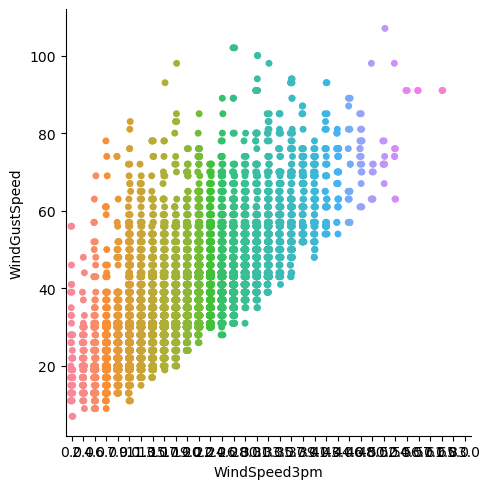

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='WindSpeed3pm', y='WindGustSpeed', data=data)
plt.show()


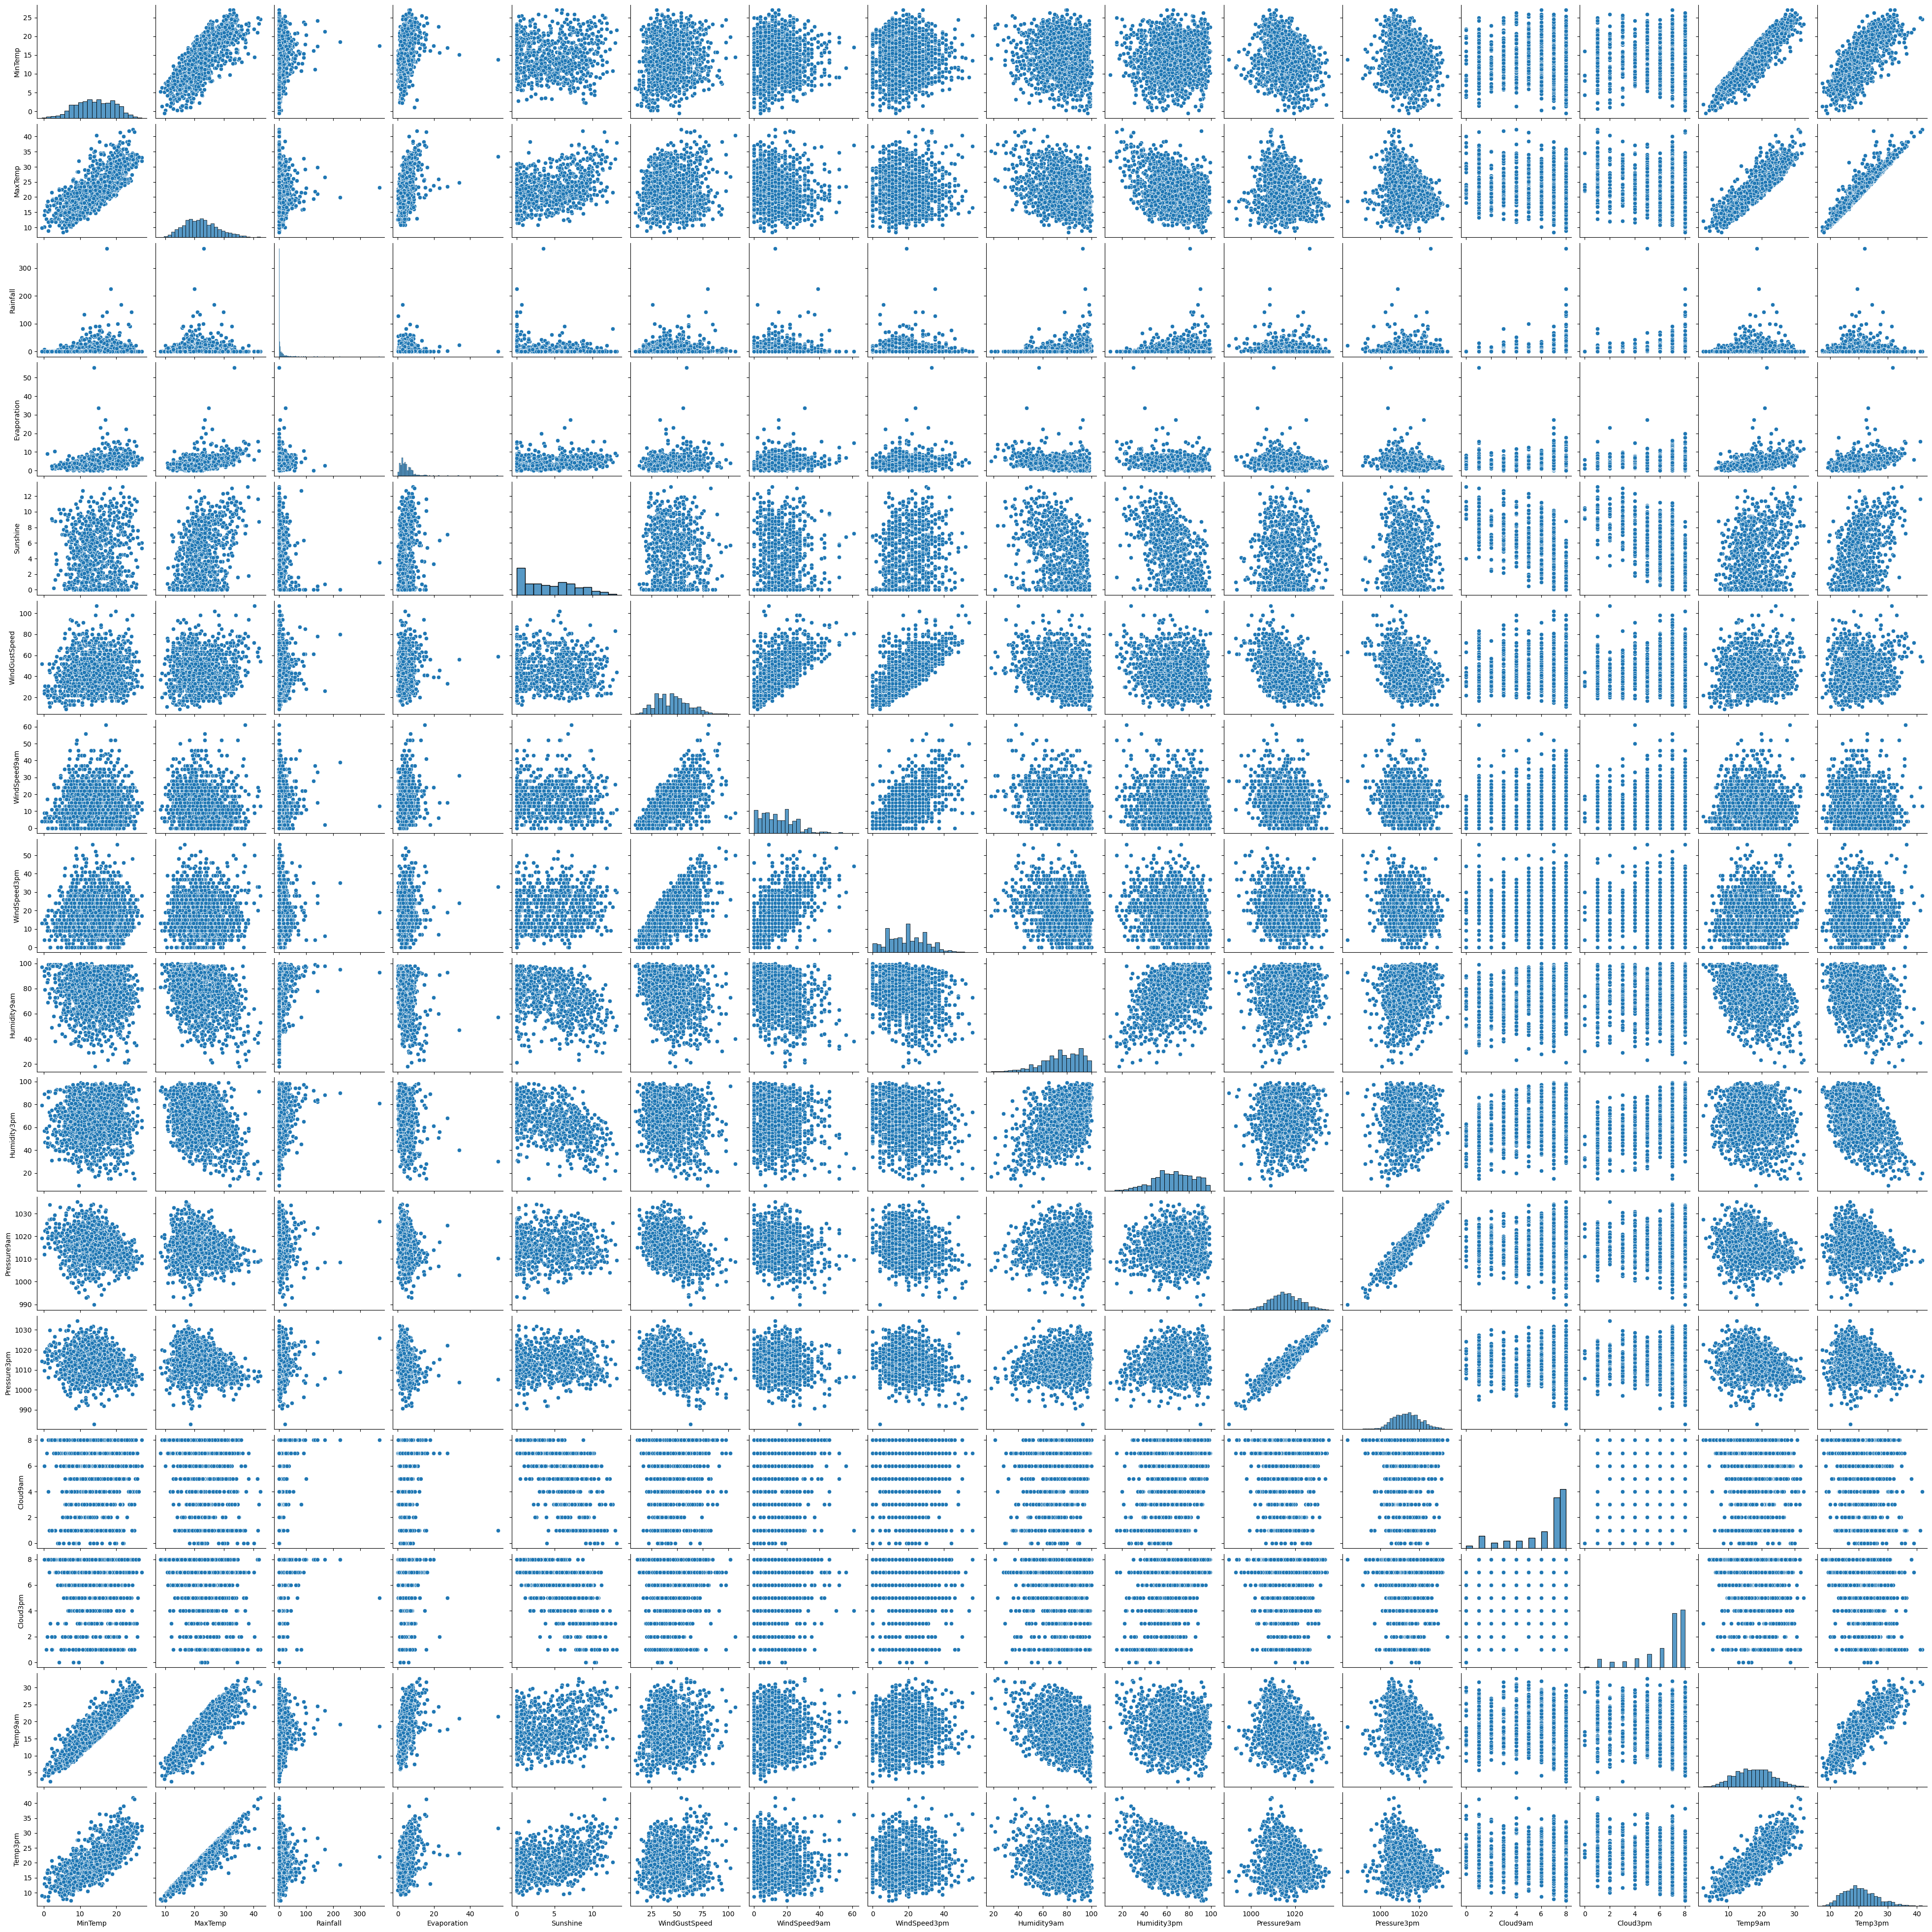

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['RainTomorrow']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()



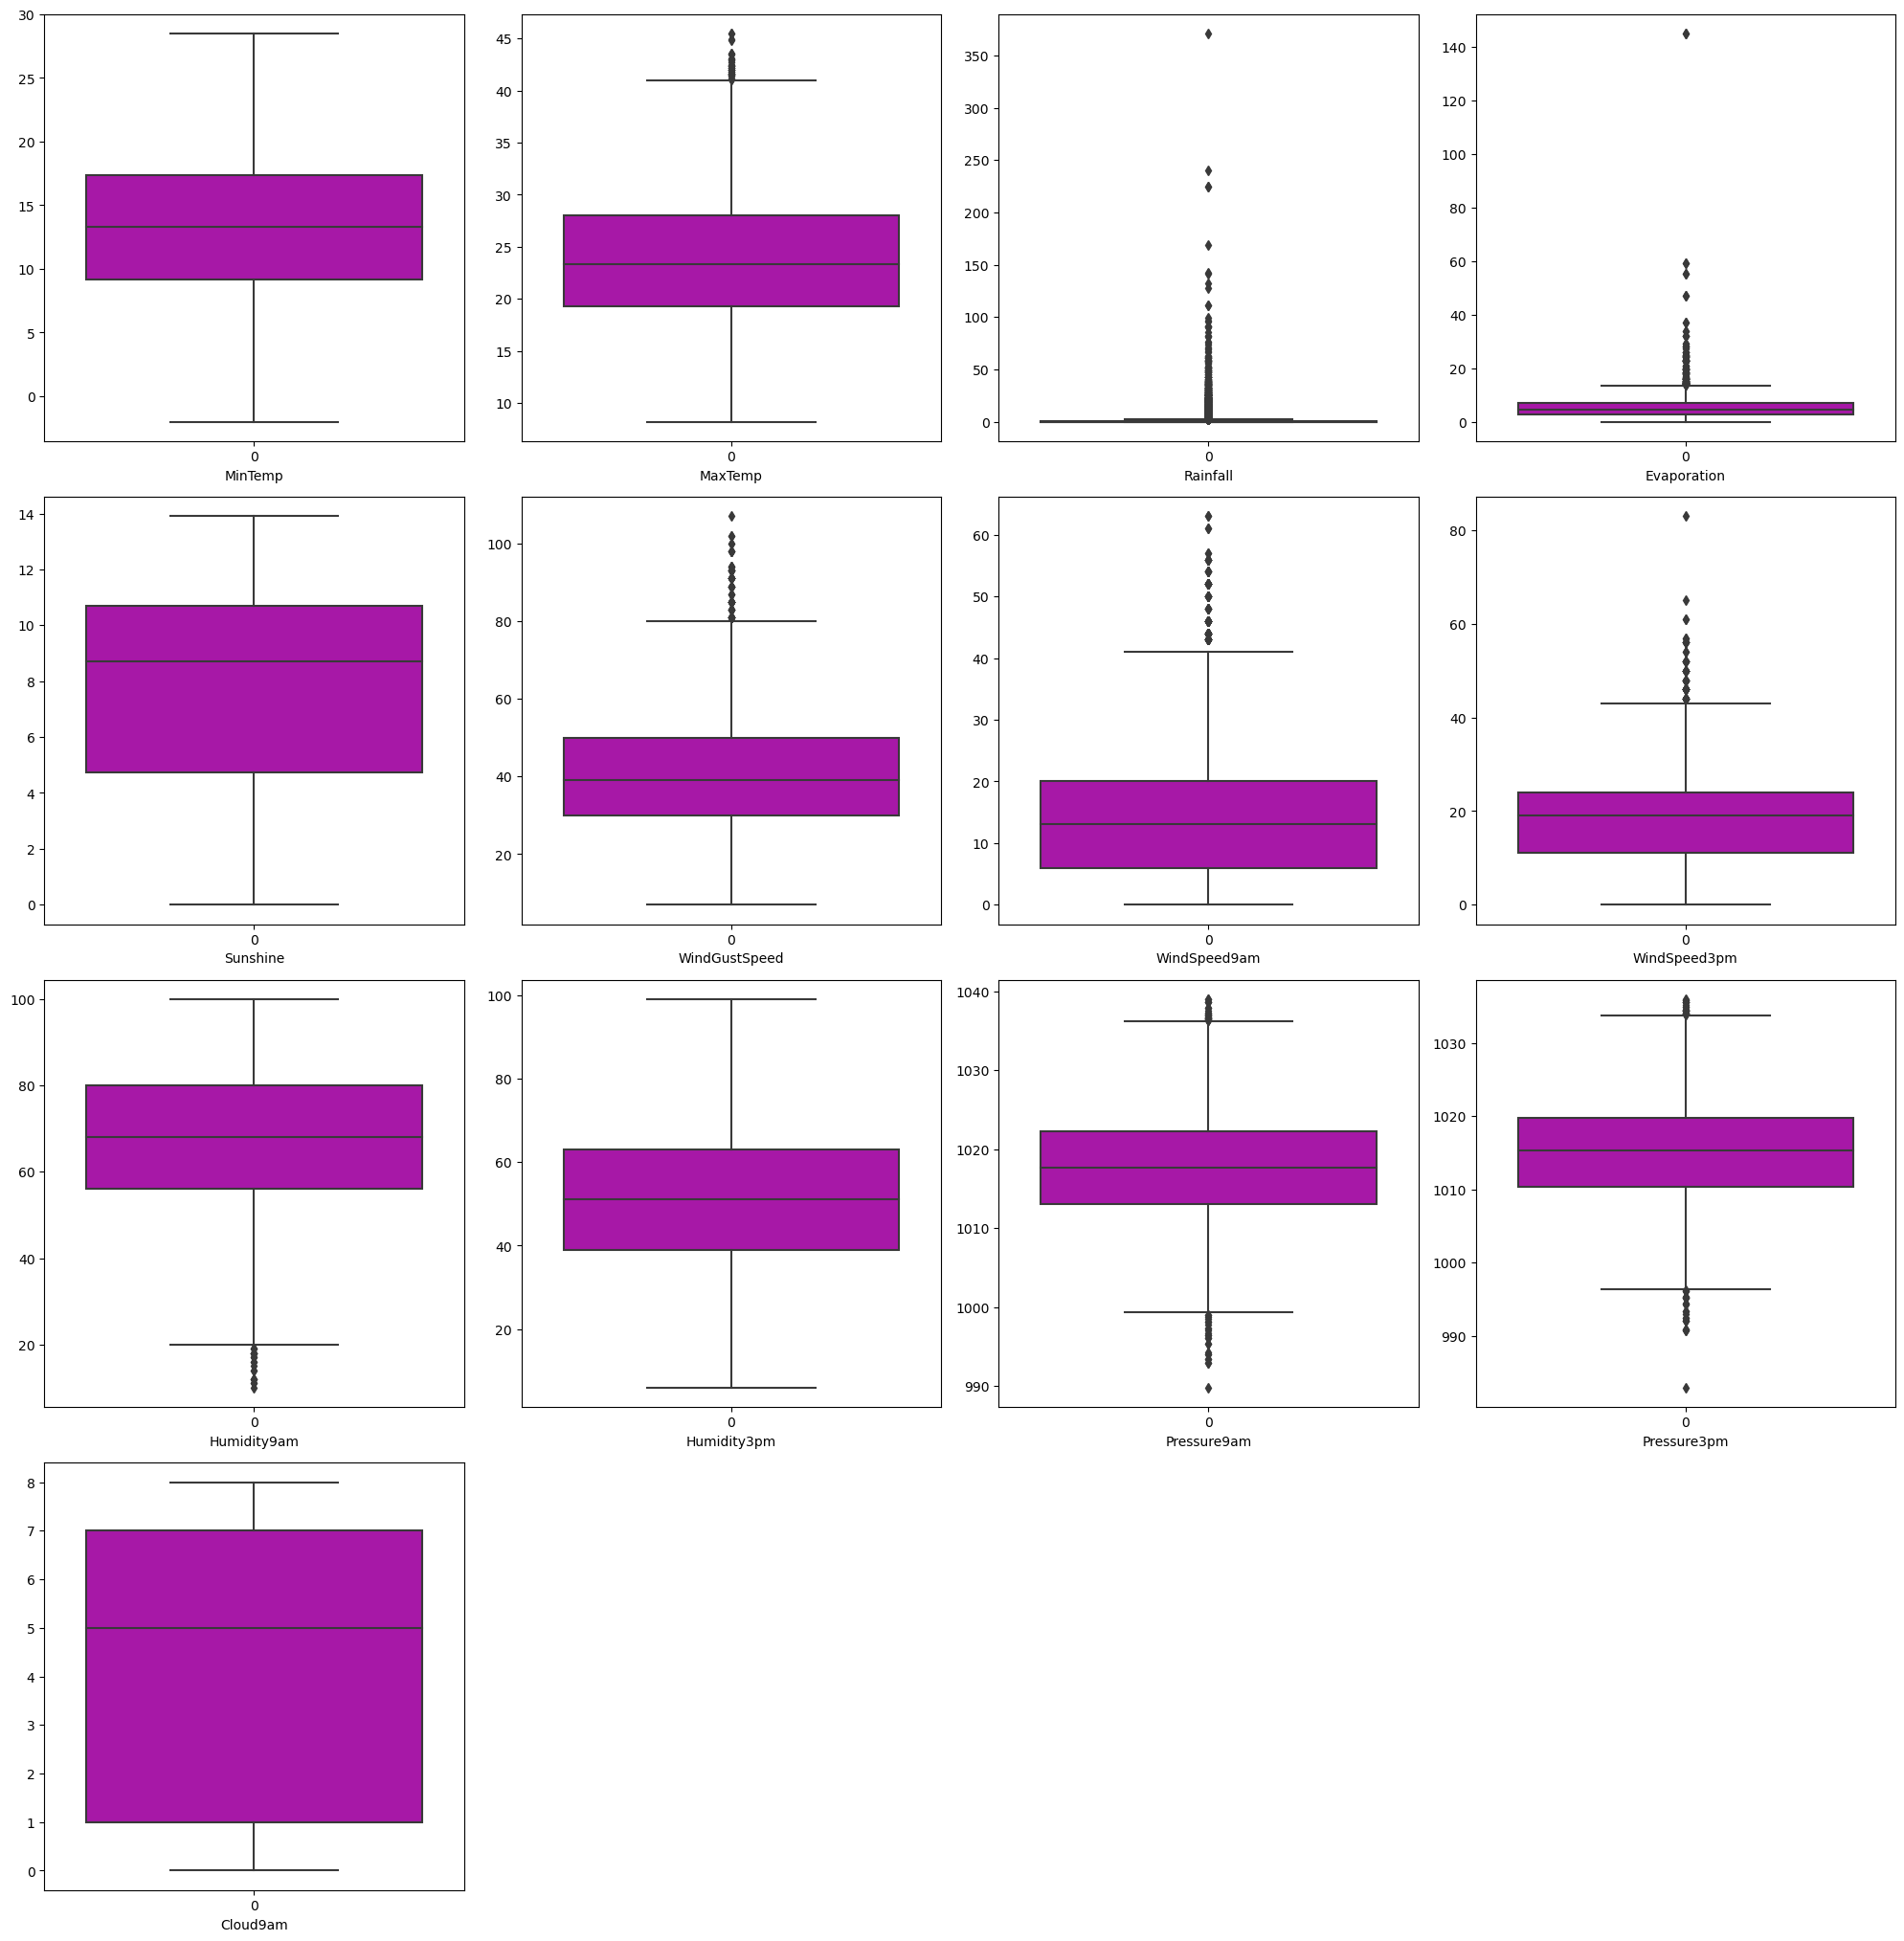

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 25))

p = 1
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns

for i in numeric_columns:
    if p <= 13:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(data=data[i], color="m")
        plt.xlabel(i)
        p += 1

plt.tight_layout()
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


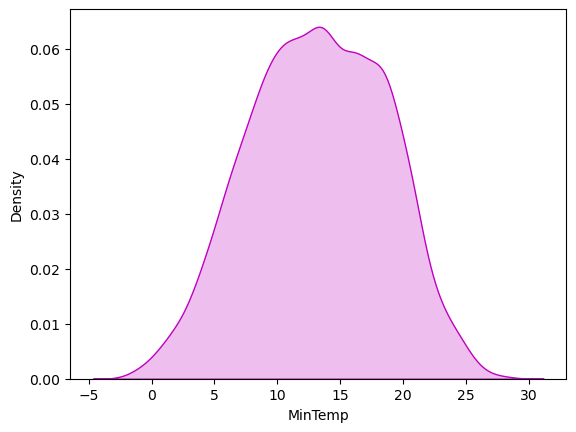

In [40]:
sns.distplot(data["MinTemp"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


 normalized

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


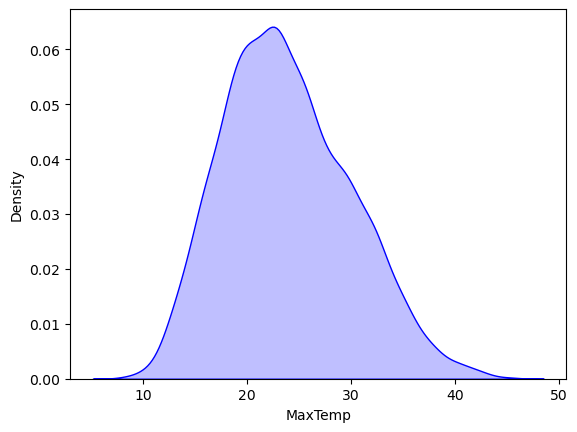

In [41]:
sns.distplot(data["MaxTemp"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


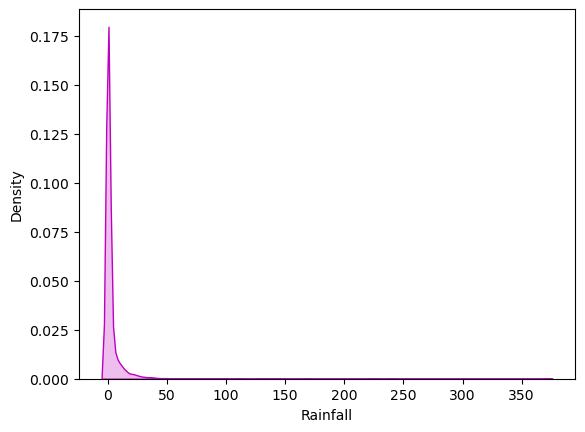

In [42]:
sns.distplot(data["Rainfall"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

left skewed

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


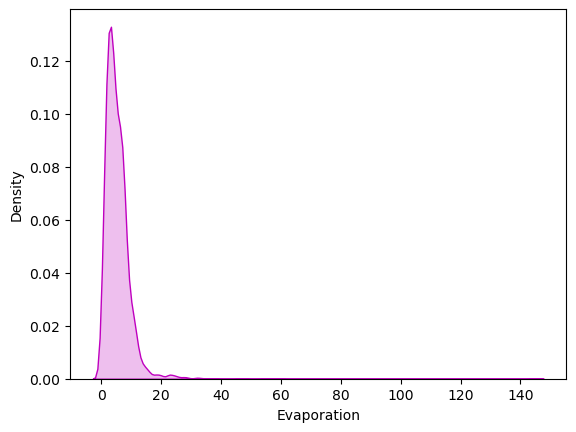

In [43]:
sns.distplot(data["Evaporation"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

skewed data 

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


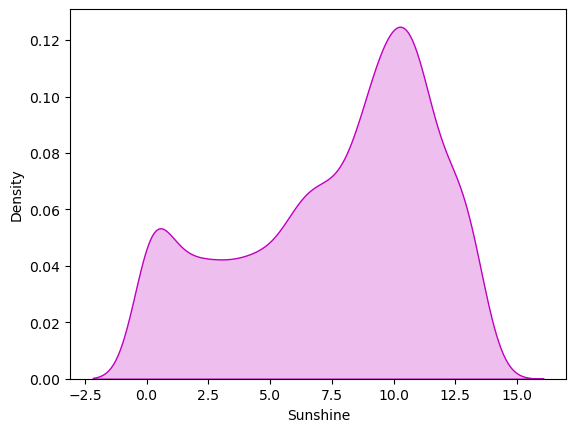

In [44]:
sns.distplot(data["Sunshine"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

binomial distribution

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


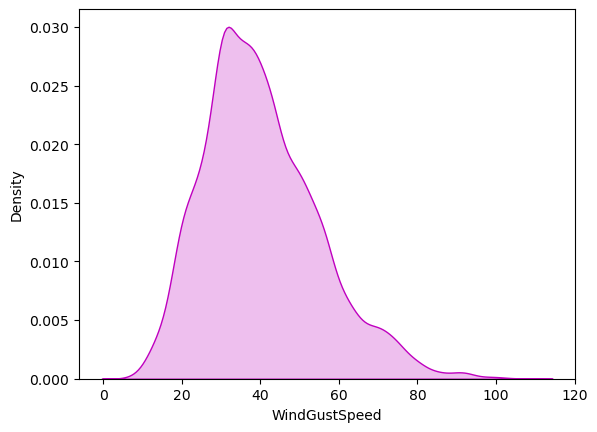

In [45]:
sns.distplot(data["WindGustSpeed"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


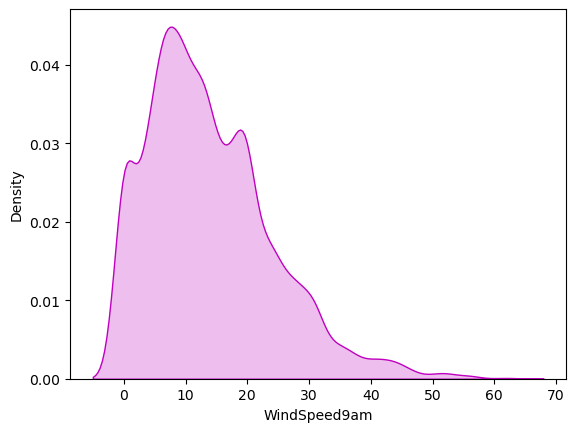

In [47]:
sns.distplot(data["WindSpeed9am"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


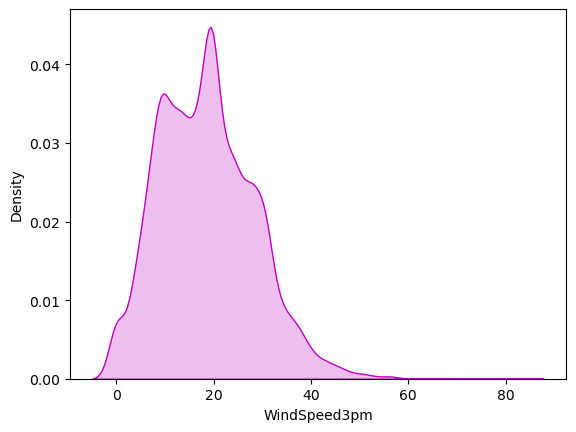

In [49]:
sns.distplot(data["WindSpeed3pm"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


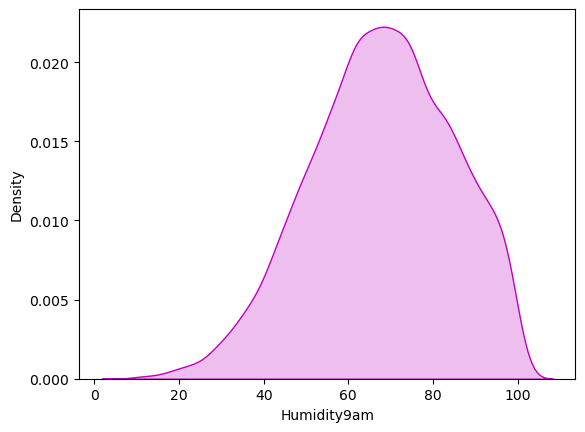

In [50]:
sns.distplot(data["Humidity9am"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

In [ ]:
right skewed

In [58]:
import numpy as np
from scipy.stats import zscore
data2=data1[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]
z=np.abs(zscore(data2))
z

MinTemp       MaxTemp  Rainfall   Evaporation      Sunshine  \
0     0.038425  1.570089e-01  0.213986  2.305893e-16  1.257472e-15   
1     1.076989  2.028121e-01  0.272189  2.305893e-16  1.257472e-15   
2     0.054526  3.009450e-01  0.272189  2.305893e-16  1.257472e-15   
3     0.742365  6.771214e-01  0.272189  2.305893e-16  1.257472e-15   
4     0.800625  1.380408e+00  0.175183  2.305893e-16  1.257472e-15   
...        ...           ...       ...           ...           ...   
8420  1.932140  7.523137e-02  0.272189  2.305893e-16  1.257472e-15   
8421  1.783418  2.355231e-01  0.272189  2.305893e-16  1.257472e-15   
8422  1.448794  4.972110e-01  0.272189  2.305893e-16  1.257472e-15   
8423  1.002628  5.135665e-01  0.272189  2.305893e-16  1.257472e-15   
8424  0.317279  2.905320e-15  0.272189  2.305893e-16  1.257472e-15   

      WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          0.277710      0.607461      0.563297     0.189439     1.597406   
1          0.277710      0.972321      0.357200     1.420268     1.433568   
2          0.422897      0.508725      0.769394     1.777981     1.160505   
3          1.174166      0.281166      0.982428     1.360650     1.925081   
4          0.059928      0.676112      0.151104     0.845246     0.996668   
...             ...           ...           ...          ...          ...   
8420       0.666009      0.083694      0.776331     1.002937     1.488181   
8421       1.319354      0.083694      0.982428     0.704843     1.652018   
8422       0.230447      0.478639      0.982428     0.883699     1.488181   
8423       0.883791      0.083694      1.188525     1.002937     1.488181   
8424       0.000000      0.311252      0.158041     0.347130     0.832830   

      Pressure9am  Pressure3pm  Cloud9am      Cloud3pm   Temp9am   Temp3pm  
0        1.584003     1.308665  1.413459  3.862851e-16  0.153712  0.108138  
1        1.121880     1.196072  0.000000  3.862851e-16  0.100217  0.312348  
2        1.599939     1.051309  0.000000  1.088680e+00  0.577390  0.127334  
3        0.006411     0.391836  0.000000  3.862851e-16  0.060269  0.682376  
4        1.090010     1.485596  1.001777  1.520830e+00  0.006773  1.220599  
...           ...          ...       ...           ...       ...       ...  
8420     1.109058     0.814518  0.000000  3.862851e-16  1.366273  0.007221  
8421     0.933770     0.621501  0.000000  3.862851e-16  1.223619  0.345987  
8422     0.535388     0.251553  0.000000  3.862851e-16  0.938310  0.615099  
8423     0.280424     0.203299  0.644950  1.088680e+00  0.474684  0.598279  
8424     0.407906     0.428485  1.413459  1.520830e+00  0.492516  0.259513  

[8425 rows x 16 columns]

In [59]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [107]:
z.iloc[12,10]

3.7193299828367357

In [62]:
data.skew()# -05 to +0.5

Date              0.386560
Location         -0.050456
MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustDir      -0.130592
WindGustSpeed     0.711103
WindDir9am       -0.027310
WindDir3pm       -0.088767
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
RainToday         1.197839
RainTomorrow      1.197253
dtype: float64

In [63]:
import numpy as np

data1['Rainfall'] = np.cbrt(data['Rainfall'])

In [64]:
data1.skew()# -05 to +0.5

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall          1.719054
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir      -0.139021
WindGustSpeed     0.757000
WindDir9am       -0.028761
WindDir3pm       -0.090435
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.215267
RainTomorrow      1.214599
dtype: float64

data1.skew()# -05 to +0.5

Encoding Categorical Columns

In [66]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data1

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0.0       1.0     13.4  22.900000  0.843433     5.389395  7.632205   
1        1.0       1.0      7.4  25.100000  0.000000     5.389395  7.632205   
2        2.0       1.0     12.9  25.700000  0.000000     5.389395  7.632205   
3        3.0       1.0      9.2  28.000000  0.000000     5.389395  7.632205   
4        4.0       1.0     17.5  32.300000  1.000000     5.389395  7.632205   
...      ...       ...      ...        ...       ...          ...       ...   
8420  2999.0       9.0      2.8  23.400000  0.000000     5.389395  7.632205   
8421  3000.0       9.0      3.6  25.300000  0.000000     5.389395  7.632205   
8422  3001.0       9.0      5.4  26.900000  0.000000     5.389395  7.632205   
8423  3002.0       9.0      7.8  27.000000  0.000000     5.389395  7.632205   
8424  3003.0       9.0     14.9  23.859976  0.000000     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0       13.000000      44.000000        13.0  ...         71.0         22.0   
1       14.000000      44.000000         6.0  ...         44.0         25.0   
2       15.000000      46.000000        13.0  ...         38.0         30.0   
3        4.000000      24.000000         9.0  ...         45.0         16.0   
4       13.000000      41.000000         1.0  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420     0.000000      31.000000         9.0  ...         51.0         24.0   
8421     6.000000      22.000000         9.0  ...         56.0         21.0   
8422     3.000000      37.000000         9.0  ...         53.0         24.0   
8423     9.000000      28.000000        10.0  ...         51.0         24.0   
8424     7.780065      40.174469         2.0  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0           0.0       0.00000  
1           0.0       0.00000  
2           0.0       0.00000  
3           0.0       0.00000  
4           0.0       0.00000  
...         ...           ...  
8420        0.0       0.00000  
8421        0.0       0.00000  
8422        0.0       0.00000  
8423        0.0       0.00000  
8424        0.0       0.24322  

[8425 rows x 23 columns]

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   float64
 1   Location       8425 non-null   float64
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   float64
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   float64
 10  WindDir3pm     8425 non-null   float64
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [68]:
data1.describe()

Date     Location      MinTemp      MaxTemp     Rainfall  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8185.000000   
mean   1296.570564     5.793591    13.193305    23.859976     0.554807   
std     854.249434     3.162654     5.379488     6.114516     0.904775   
min       0.000000     0.000000    -2.000000     8.200000     0.000000   
25%     589.000000     3.000000     9.300000    19.300000     0.000000   
50%    1088.000000     6.000000    13.200000    23.300000     0.000000   
75%    2021.000000     8.000000    17.300000    28.000000     1.000000   
max    3003.000000    11.000000    28.500000    45.500000     7.185516   

       Evaporation     Sunshine  WindGustDir  WindGustSpeed   WindDir9am  ...  \
count  8425.000000  8425.000000  8425.000000    8425.000000  8425.000000  ...   
mean      5.389395     7.632205     7.780065      40.174469     7.733149  ...   
std       3.852004     2.825451     4.443288      13.776101     4.366057  ...   
min       0.000000     0.000000     0.000000       7.000000     0.000000  ...   
25%       4.000000     7.632205     4.000000      31.000000     4.000000  ...   
50%       5.389395     7.632205     7.780065      40.174469     7.733149  ...   
75%       5.389395     8.900000    12.000000      48.000000    12.000000  ...   
max     145.000000    13.900000    15.000000     107.000000    15.000000  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     67.822496    51.249790  1017.640233  1015.236075     4.566622   
std      16.774231    18.311894     6.275759     6.217451     2.429205   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1014.000000  1011.400000     3.000000   
50%      68.000000    51.000000  1017.640233  1015.236075     4.566622   
75%      80.000000    63.000000  1021.300000  1018.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  8425.000000  8425.000000  8425.000000  8425.000000   8425.000000  
mean      4.503183    17.762015    22.442934     0.243128      0.243220  
std       2.299419     5.608301     5.945849     0.422843      0.422923  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       3.000000    13.800000    18.100000     0.000000      0.000000  
50%       4.503183    17.762015    22.000000     0.000000      0.000000  
75%       7.000000    21.900000    26.300000     0.243128      0.243220  
max       8.000000    39.400000    44.100000     1.000000      1.000000  

[8 rows x 23 columns]

CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [69]:
corr=data1.corr()
corr

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016931  0.102409  0.010275     0.153853   
Location       0.475037  1.000000  0.116531  0.064268  0.015977     0.143519   
MinTemp        0.016931  0.116531  1.000000  0.717522  0.091065     0.254965   
MaxTemp        0.102409  0.064268  0.717522  1.000000 -0.225263     0.322405   
Rainfall       0.010275  0.015977  0.091065 -0.225263  1.000000    -0.063508   
Evaporation    0.153853  0.143519  0.254965  0.322405 -0.063508     1.000000   
Sunshine       0.065101  0.057817  0.056184  0.378403 -0.273076     0.226001   
WindGustDir    0.002610 -0.021180 -0.156861 -0.236762  0.138120    -0.072234   
WindGustSpeed -0.037361  0.231396  0.230058  0.139998  0.096252     0.136371   
WindDir9am     0.024279 -0.050449 -0.088101 -0.245924  0.179662    -0.058219   
WindDir3pm    -0.009079 -0.028042 -0.144033 -0.177394  0.104235    -0.047889   
WindSpeed9am  -0.083943  0.221378  0.136872  0.013314  0.040064     0.104294   
WindSpeed3pm  -0.046362  0.231801  0.178349  0.088172  0.025068     0.101126   
Humidity9am    0.086328  0.005662 -0.130731 -0.390976  0.418355    -0.213108   
Humidity3pm   -0.038345  0.055790  0.079048 -0.421879  0.401861    -0.161661   
Pressure9am    0.030809 -0.032261 -0.429432 -0.325721 -0.123454    -0.177786   
Pressure3pm    0.013545 -0.020574 -0.422991 -0.403258 -0.047205    -0.189558   
Cloud9am       0.005237  0.038019  0.091604 -0.253968  0.316105    -0.062283   
Cloud3pm      -0.010572  0.017561  0.038414 -0.250132  0.269389    -0.108022   
Temp9am        0.070703  0.118051  0.887119  0.866039 -0.086494     0.305264   
Temp3pm        0.113734  0.060570  0.685520  0.974506 -0.234392     0.315109   
RainToday     -0.006325  0.007068  0.069043 -0.225172  0.880506    -0.091700   
RainTomorrow  -0.005862  0.006664  0.097955 -0.151976  0.352547    -0.061177   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.065101     0.002610      -0.037361    0.024279  ...   
Location       0.057817    -0.021180       0.231396   -0.050449  ...   
MinTemp        0.056184    -0.156861       0.230058   -0.088101  ...   
MaxTemp        0.378403    -0.236762       0.139998   -0.245924  ...   
Rainfall      -0.273076     0.138120       0.096252    0.179662  ...   
Evaporation    0.226001    -0.072234       0.136371   -0.058219  ...   
Sunshine       1.000000    -0.109562      -0.013778   -0.083901  ...   
WindGustDir   -0.109562     1.000000       0.017559    0.404709  ...   
WindGustSpeed -0.013778     0.017559       1.000000   -0.124473  ...   
WindDir9am    -0.083901     0.404709      -0.124473    1.000000  ...   
WindDir3pm    -0.067804     0.542701       0.073409    0.266336  ...   
WindSpeed9am  -0.018069    -0.050563       0.600198   -0.075314  ...   
WindSpeed3pm   0.030145     0.044635       0.634939   -0.034768  ...   
Humidity9am   -0.360831     0.068504      -0.269593    0.102930  ...   
Humidity3pm   -0.440268     0.079594      -0.091860    0.151840  ...   
Pressure9am    0.021887    -0.119318      -0.407139    0.010917  ...   
Pressure3pm   -0.035863    -0.031475      -0.372651    0.097374  ...   
Cloud9am      -0.533391     0.108390       0.023313    0.114581  ...   
Cloud3pm      -0.547304     0.088982       0.078631    0.068183  ...   
Temp9am        0.250640    -0.187304       0.202298   -0.156612  ...   
Temp3pm        0.395324    -0.250847       0.102199   -0.250499  ...   
RainToday     -0.239821     0.135286       0.082540    0.167754  ...   
RainTomorrow  -0.335212     0.054393       0.195808    0.030114  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.086328    -0.038345     0.030809     0.013545  0.005237   
Location          0.005662     0.055790    -0.032261    -0.020574  0.038019   
MinTemp          -0.130731     0.079048    -0.429432    -0.422991  0.091604   
MaxTemp          -0.390976    -0.421879    -0.325721 

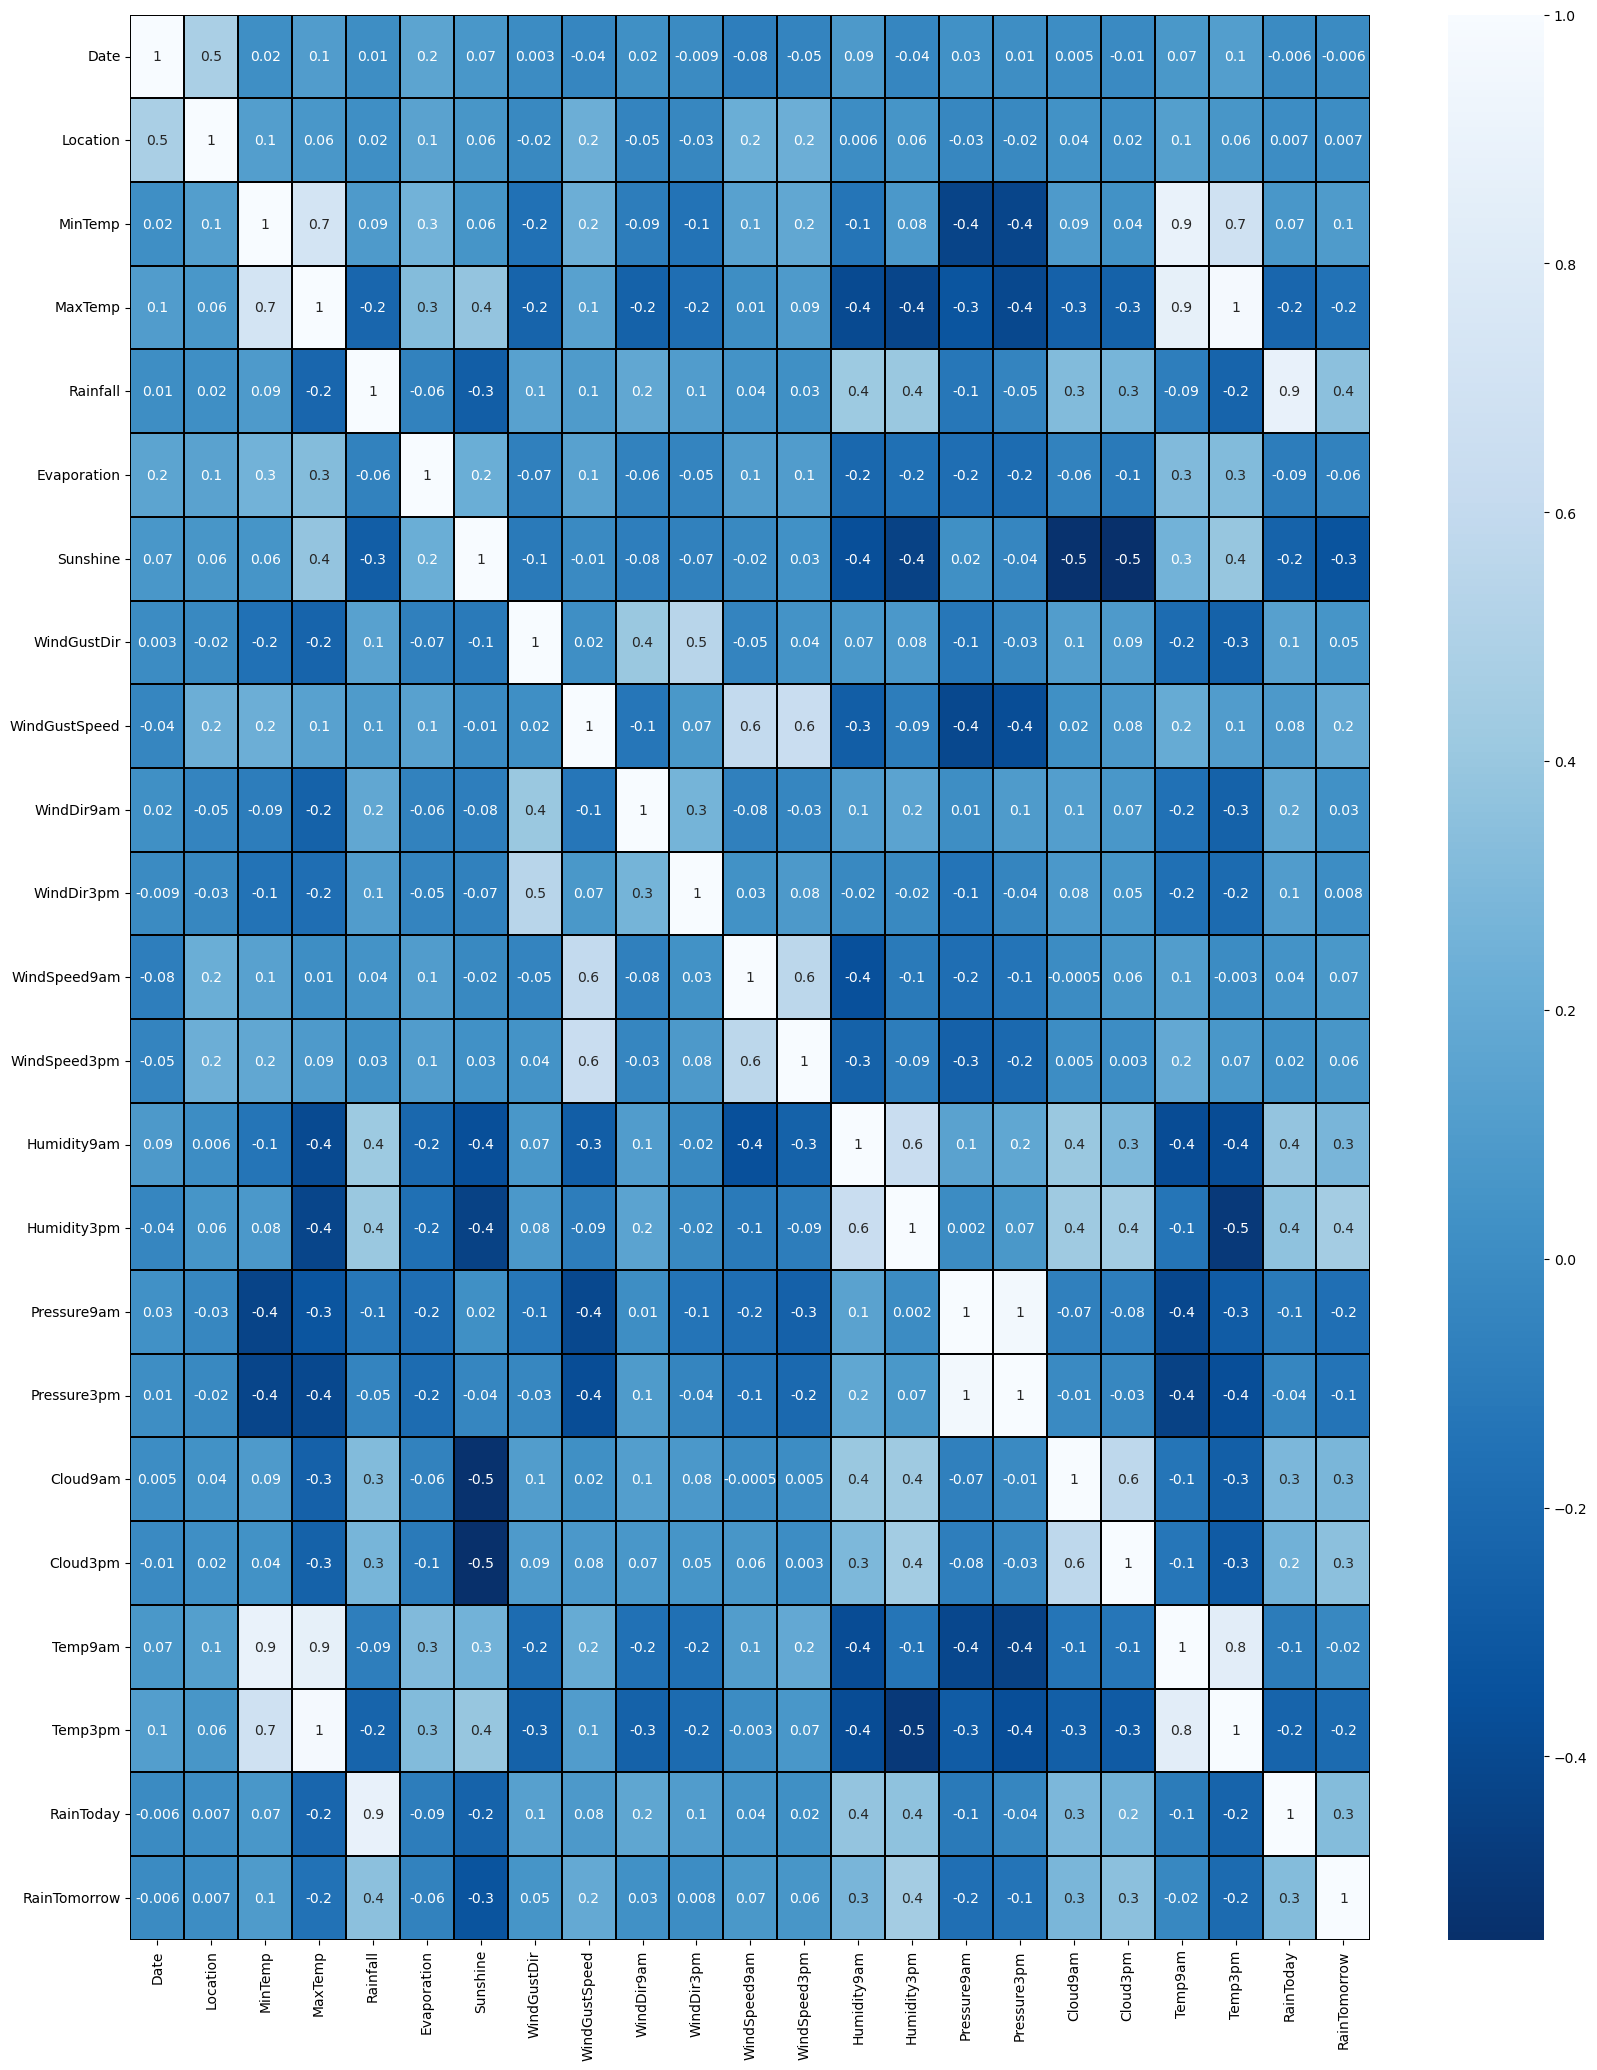

In [71]:
plt.figure(figsize=(20,25))
sns.heatmap(data1.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. 

In [72]:
corr["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.449016
Rainfall         0.352547
Cloud3pm         0.349413
RainToday        0.318291
Cloud9am         0.286598
Humidity9am      0.275125
WindGustSpeed    0.195808
MinTemp          0.097955
WindSpeed9am     0.071914
WindSpeed3pm     0.057137
WindGustDir      0.054393
WindDir9am       0.030114
WindDir3pm       0.008476
Location         0.006664
Date            -0.005862
Temp9am         -0.021624
Evaporation     -0.061177
Pressure3pm     -0.141062
MaxTemp         -0.151976
Pressure9am     -0.170148
Temp3pm         -0.193588
Sunshine        -0.335212
Name: RainTomorrow, dtype: float64

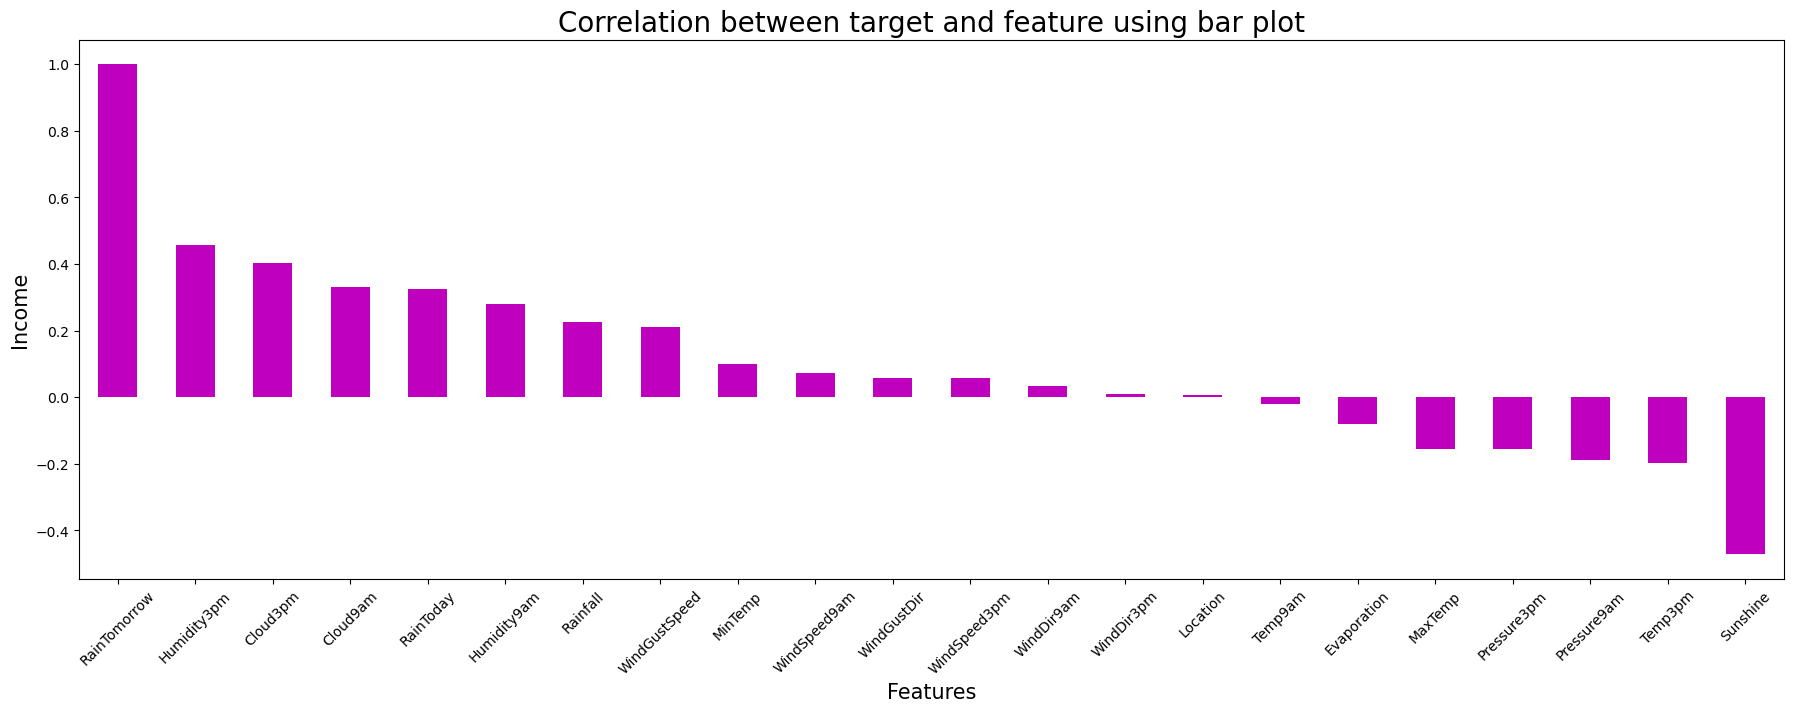

In [73]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["RainTomorrow"].sort_values(ascending=False).drop(["Date"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("Income", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

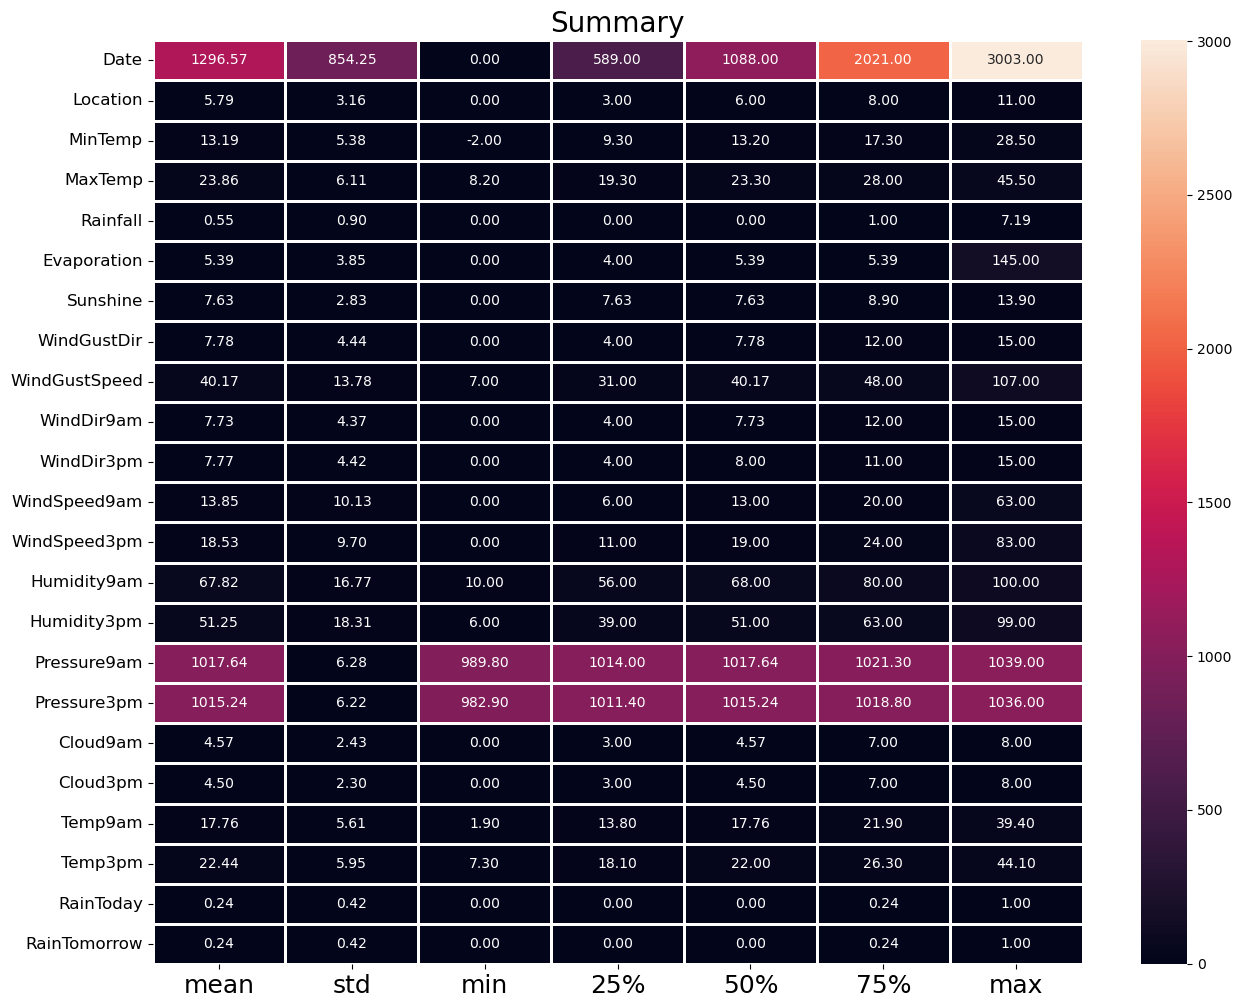

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(data1.describe()[1:].transpose(), linewidths=2, annot=True, fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary", fontsize=20)

plt.show()


In [75]:
x=data1.drop("RainTomorrow",axis=1)
y=data["RainTomorrow"]

In [79]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data into the variable `x`
x = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

# Select only the numeric columns
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Apply StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

print(x_scaled)



[[ 0.0382536  -0.15644877 -0.21091577 ...         nan -0.15320076
  -0.10752019]
 [-1.07218454  0.20208859 -0.26828406 ...         nan -0.09988353
   0.31056368]
 [-0.05428291  0.29987151 -0.26828406 ... -0.91643664  0.57546804
   0.12660678]
 ...
 [-1.44233059  0.49543734 -0.26828406 ...         nan -0.9351868
   0.61158407]
 [-0.99815533  0.5117345  -0.26828406 ... -0.91643664 -0.47310414
   0.59486071]
 [ 0.31586313         nan -0.26828406 ...  1.28021489 -0.49087655
  -0.25803038]]


CHECKING VARIANCE INFLATION(VIF)

In [80]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)




          Feature            VIF
0         MinTemp      59.557854
1         MaxTemp     603.538112
2        Rainfall       1.291108
3     Evaporation       5.545900
4        Sunshine      19.695195
5   WindGustSpeed      30.792864
6    WindSpeed9am       8.861389
7    WindSpeed3pm      13.499339
8     Humidity9am      63.371821
9     Humidity3pm      51.302818
10    Pressure9am  467812.276574
11    Pressure3pm  465344.229697
12       Cloud9am       8.193488
13       Cloud3pm       8.695584
14        Temp9am     198.725031
15        Temp3pm     704.343127


Education_num has highest VIF Terefore it is dropped first

In [81]:
# dropping date column
x.drop("Pressure9am",axis=1,inplace=True)

In [82]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)


          Feature         VIF
0         MinTemp   57.984812
1         MaxTemp  603.508981
2        Rainfall    1.279718
3     Evaporation    5.494804
4        Sunshine   19.477036
5   WindGustSpeed   30.689545
6    WindSpeed9am    8.853008
7    WindSpeed3pm   13.428809
8     Humidity9am   62.727974
9     Humidity3pm   49.807552
10    Pressure3pm  144.786015
11       Cloud9am    8.154619
12       Cloud3pm    8.681251
13        Temp9am  191.844597
14        Temp3pm  657.114454


In [83]:
y.value_counts()

0.0    6195
1.0    1991
Name: RainTomorrow, dtype: int64

The data is not balanced since it is a classification problem

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Convert non-numeric values in x to numeric representation
x_numeric = x_numeric.apply(pd.to_numeric, errors='coerce')

# Convert non-numeric values in y to numeric representation using label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure x and y have the same number of samples
min_samples = min(len(x_numeric), len(y_encoded))
x_numeric = x_numeric[:min_samples]
y_encoded = y_encoded[:min_samples]

# Apply SMOTE for oversampling
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x_numeric, y_encoded)





In [85]:
# Checking value count of target column
y.value_counts()

0.0    6195
1.0    1991
Name: RainTomorrow, dtype: int64

data is balanced

MODELLING

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['RainTomorrow'].astype('category')  # Target variable

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)


ValueError: Unknown label type: 'continuous'

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['RainTomorrow']  # Target variable

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)



Best Accuracy is 0.899129746835443 on random state 29


In [92]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [93]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score






In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))



0.8943829113924051
[[1834    9   52]
 [  14   51    4]
 [ 184    4  376]]


In [77]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.15745079662605435
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  4  0]
 [ 0  0 38 ...  1  0  0]
 ...
 [ 0  0  0 ... 36  9  0]
 [ 0  0  0 ... 15 23  0]
 [ 0  0  1 ...  8  4  5]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.00      0.00      0.00        88
         2.0       0.33      0.37      0.35       103
         3.0       0.00      0.00      0.00       105
         4.0       0.16      0.08      0.10       104
         5.0       0.07      0.33      0.12        96
         6.0       0.15      0.33      0.20        92
         7.0       0.06      0.01      0.02       111
         8.0       0.85      0.46      0.60       112
         9.0       0.12      0.41      0.19       111
        10.0       0.00      0.00      0.00        95
        11.0       0.15      0.02      0.03       106
        12.0       0.18      0.49      0.26        92
        13.0       0.34      0.32      0.33       103
        14.0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [95]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.834256329113924
[[1817    0   78]
 [  57    0   12]
 [ 272    0  292]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1895
           1       0.00      0.00      0.00        69
           2       0.76      0.52      0.62       564

    accuracy                           0.83      2528
   macro avg       0.54      0.49      0.51      2528
weighted avg       0.81      0.83      0.81      2528



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
pred_train=GB.predict(x_train)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8520569620253164
[[1807    9   79]
 [  27   36    6]
 [ 244    9  311]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1895
           1       0.67      0.52      0.59        69
           2       0.79      0.55      0.65       564

    accuracy                           0.85      2528
   macro avg       0.77      0.68      0.71      2528
weighted avg       0.85      0.85      0.84      2528



In [80]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.048359887535145266
[[ 0  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0 44  0 ...  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.02      0.44      0.04        88
         2.0       0.00      0.00      0.00       103
         3.0       0.00      0.00      0.00       105
         4.0       0.19      0.19      0.19       104
         5.0       0.00      0.00      0.00        96
         6.0       0.00      0.00      0.00        92
         7.0       0.00      0.00      0.00       111
         8.0       0.00      0.00      0.00       112
         9.0       0.00      0.00      0.00       111
        10.0       0.03      0.48      0.06        95
        11.0       0.00      0.00      0.00       106
        12.0       0.04      0.14      0.06        92
        13.0       0.00      0.00      0.00       103
        14.0

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.8757911392405063
[[1823    6   66]
 [  15   48    6]
 [ 214    7  343]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1895
           1       0.79      0.70      0.74        69
           2       0.83      0.61      0.70       564

    accuracy                           0.88      2528
   macro avg       0.83      0.76      0.79      2528
weighted avg       0.87      0.88      0.87      2528



In [98]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.8924050632911392
[[1831    8   56]
 [  14   51    4]
 [ 184    6  374]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1895
           1       0.78      0.74      0.76        69
           2       0.86      0.66      0.75       564

    accuracy                           0.89      2528
   macro avg       0.85      0.79      0.81      2528
weighted avg       0.89      0.89      0.89      2528



In [99]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.83204748 0.85222552 0.87537092 0.80296736 0.84866469]
0.8422551928783383
difference between ACCURACY score and cross validation score is - 5.212771851406684


In [100]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_GB)-score.mean())*100)

[0.82255193 0.79465875 0.71632047 0.59169139 0.82967359]
0.7509792284866469
difference between ACCURACY score and cross validation score is - 10.107773353866955


In [101]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[0.82551929 0.78219585 0.78872404 0.79465875 0.82433234]
0.803086053412463
difference between ACCURACY score and cross validation score is - 3.1170275701461025


In [92]:
ABC=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

0.8637387387387387
[[7050  412]
 [ 919 1387]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7462
         1.0       0.77      0.60      0.68      2306

    accuracy                           0.86      9768
   macro avg       0.83      0.77      0.79      9768
weighted avg       0.86      0.86      0.86      9768

[0.8544226  0.85227273 0.85933661 0.86640049 0.86164005]
0.8588144963144962
difference between ACCURACY score and cross validation score is - 0.49242424242424976


In [102]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[0.7958457  0.83382789 0.8379822  0.72522255 0.83738872]
0.806053412462908
difference between ACCURACY score and cross validation score is - 6.973772677759838


In [103]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

0.8935917721518988
[[1834    9   52]
 [  14   51    4]
 [ 184    6  374]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1895
           1       0.77      0.74      0.76        69
           2       0.87      0.66      0.75       564

    accuracy                           0.89      2528
   macro avg       0.85      0.79      0.81      2528
weighted avg       0.89      0.89      0.89      2528

[0.83145401 0.8504451  0.88249258 0.81424332 0.83620178]
0.842967359050445
difference between r2 score and cross validation score is - 5.062441310145383


HYPER PARAMETER TUNING

In [104]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
   

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [100]:
best_params = gscv.best_params_
print(best_params)


{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 10}


In [105]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)


In [106]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)


89.28006329113924


PLOTTING ROC AND COMPARE AUC FOR MODELS

In [165]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: predict_proba() missing 1 required positional argument: 'X'

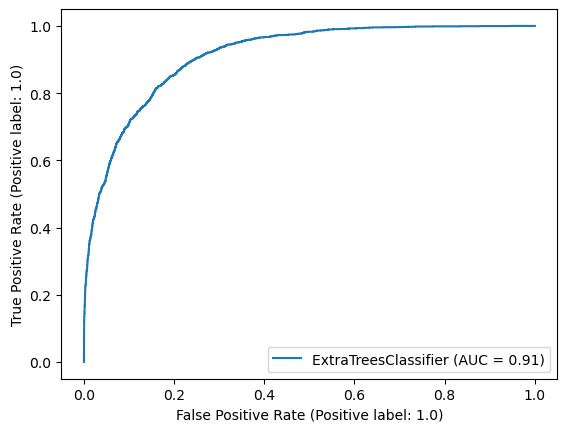

In [102]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


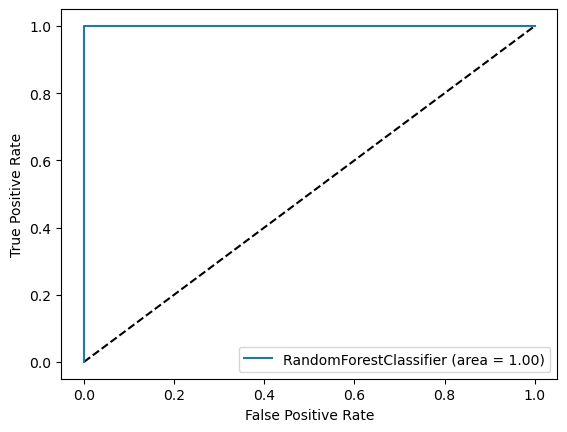

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import joblib

joblib.dump(Final_model, 'Attrition.pkl')

model = joblib.load('Attrition.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

